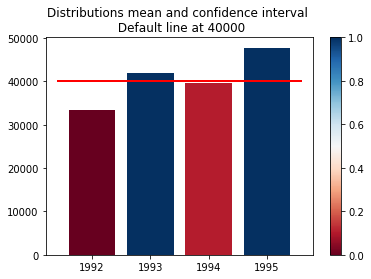

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# note matplotlib,cm is colorsmap for size bar

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000, 200000, 3650),
                   np.random.normal(43000, 100000, 3650),
                   np.random.normal(43500, 140000, 3650),
                   np.random.normal(48000, 70000, 3650)],
                  index=[1992, 1993, 1994, 1995])


# calculate mean m and margin of error yerr for each of the rows in the data frame
# %% This is
dfT = df.T
#
mean_df = dfT.mean()

# %%

# %% Get mean values for each year
for year in dfT.keys():
    mean_value = dfT[year]

# yerr =the margin of error
#yerr = z * (sigma/ sqrt(n))
# sigma  = population standard deviation
#z = z-score
# n= sample size
# 1.96 means that we are looking at 95% confidence interval
n = len(dfT)
z = 1.96
sigma = df.std()

yerr_df = z * (sigma/np.sqrt(n))


def plot_graph(y_axis_value):

    prob_map = {}

    for year in dfT.keys():
        mean_value = mean_df[year]
        yerr = yerr_df[year]
        lower_limit = mean_value - yerr
        upper_limit = mean_value + yerr
        if y_axis_value < lower_limit:
            prob = 1
        elif y_axis_value > upper_limit:
            prob = 0
        else:
            prob = min(abs(mean_value-y_axis_value)/yerr, 1)
        prob_map[year] = prob

    df_prob_map = pd.Series(prob_map)

    prob_range = df_prob_map.values
    colors = cm.RdBu(prob_range/float(max(prob_range)))

    plot = plt.scatter(prob_range, prob_range, c=prob_range, cmap='RdBu')
    plt.clf()
    plt.colorbar(plot)
    plt.bar(df_prob_map.index, mean_df.values, color=colors)
    plt.xticks(df_prob_map.index, [str(i) for i in df_prob_map.index])
    #plot.spines['top'].set_visible(False)

    line, = plt.plot(plt.xlim(), [y_axis_value, y_axis_value], 'k-',
                     color=('red'), lw=2)

    plt.gca().set_title('Distributions mean and confidence interval \n Default line at 40000')
    
    plt.show()


plot_graph(40000)
